# **Resources Importing and Loading**

In [1]:
# If using Google colab, this help you access the share folder
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Our dataset :

https://www.kaggle.com/grouplens/movielens-20m-dataset

In [2]:
import pandas as pd
import numpy as np
!pip install surprise
from surprise import Dataset
from surprise import Reader
from surprise.model_selection.split import train_test_split
from surprise.model_selection import cross_validate, GridSearchCV, RandomizedSearchCV

from surprise import KNNBasic, KNNWithMeans, KNNWithZScore
from surprise import SVD, SVDpp, NMF
from surprise import SlopeOne, CoClustering

import matplotlib.pyplot as plt
%matplotlib inline
from surprise import accuracy

import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import linear_kernel

     |████████████████████████████████| 11.8MB 4.7MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp36-cp36m-linux_x86_64.whl size=1670926 sha256=ae170ac422198a8abe0490a884f38b501de07376abd81ba09ee1e50a813de99a
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [3]:
# please change the file path to your own file path.
ratings = pd.read_csv("/content/drive/Shareddrives/255_Project/rating.csv")
movies = pd.read_csv('/content/drive/Shareddrives/255_Project/movie.csv')
tag = pd.read_csv('/content/drive/Shareddrives/255_Project/tag.csv')
genome_scores = pd.read_csv('/content/drive/Shareddrives/255_Project/genome_scores.csv')
genome_tags = pd.read_csv('/content/drive/Shareddrives/255_Project/genome_tags.csv')

# **Utilize various Algorithms  in Surprise to create a high accuracy Recommender System**

## 1.Preprocessing data

In [4]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [5]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy
27275,131258,The Pirates (2014),Adventure
27276,131260,Rentun Ruusu (2001),(no genres listed)


In [6]:
ratings = ratings.drop(['timestamp'],axis=1)
ratings.drop_duplicates(subset =["userId",'movieId'], keep = False, inplace = True)
ratings.dropna(subset = ["userId"], inplace=True)
ratings.dropna(subset = ["movieId"], inplace=True)

In [7]:
ratings

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5
...,...,...,...
20000258,138493,68954,4.5
20000259,138493,69526,4.5
20000260,138493,69644,3.0
20000261,138493,70286,5.0


In [8]:
reader = Reader(rating_scale=(1,5))  #invoke reader instance of surprise library

In [9]:
# split the dataset into small pieces
n = 5000  #chunk row size
list_train = [ratings[i:i+n] for i in range(0,ratings.shape[0],n)]
#[i.shape for i in list_train]

## 2.Selection of model
* use cross-validation to get the overview of RMSE for different models 

* Randomly pick one batch of data for testing


In [10]:
kk = Dataset.load_from_df(list_train[10],reader)

#### We are going to evaluate following algorithms:

1.k-NN Based Algorithms

    KNNBasic, KNNWithMeans and KNNWithZScore

2.Matrix Factorization Based Algorithms

    SVD, SVDpp and NMF

3.Other Collaborative Filtering Algorithms

    SlopeOne, CoClustering

Cross Validation: 5-Fold

Optimization Metric: RMSE

Multithreading: 5 Threads

### k-NN Based Algorithms

In [ ]:
knnbasic_cv = cross_validate(KNNBasic(), kk, cv=5, n_jobs=5, verbose=False)
knnmeans_cv = cross_validate(KNNWithMeans(), kk, cv=5, n_jobs=5, verbose=False)
knnz_cv = cross_validate(KNNWithZScore(), kk, cv=5, n_jobs=5, verbose=False)

### Matrix Factorization Based Algorithms

In [ ]:
svd_cv = cross_validate(SVD(), kk, cv=5, n_jobs=5, verbose=False)
svdpp_cv = cross_validate(SVDpp(), kk, cv=5, n_jobs=5, verbose=False)
nmf_cv = cross_validate(NMF(), kk, cv=5, n_jobs=5, verbose=False)

### Other Collaborative Filtering Algorithms

In [ ]:
slope_cv = cross_validate(SlopeOne(), kk, cv=5, n_jobs=5, verbose=False)
coclus_cv = cross_validate(CoClustering(), kk, cv=5, n_jobs=5, verbose=False)

In [ ]:
# print out RMSE for all the model and find out which has the smallest RMSE
print('Algorithm\t RMSE')
print()
print('KNN Basic', '\t', round(knnbasic_cv['test_rmse'].mean(), 4))
print('KNN Means', '\t', round(knnmeans_cv['test_rmse'].mean(), 4))
print('KNN ZScore', '\t', round(knnz_cv['test_rmse'].mean(), 4))
print()
print('SVD', '\t\t', round(svd_cv['test_rmse'].mean(), 4))
print('SVDpp', '\t\t', round(svdpp_cv['test_rmse'].mean(), 4))
print('NMF', '\t\t', round(nmf_cv['test_rmse'].mean(), 4))
print()
print('SlopeOne', '\t', round(slope_cv['test_rmse'].mean(), 4))
print('CoClustering', '\t', round(coclus_cv['test_rmse'].mean(), 4))
print()

Algorithm	 RMSE

KNN Basic 	 1.2191
KNN Means 	 1.1264
KNN ZScore 	 1.1327

SVD 		 0.9618
SVDpp 		 0.9697
NMF 		 1.1949

SlopeOne 	 1.1422
CoClustering 	 1.1662



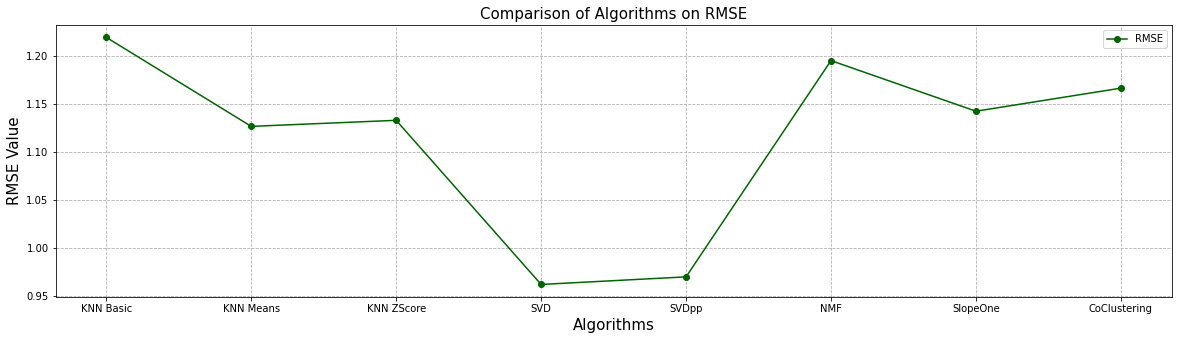

In [ ]:
# Comparison of all algorithms on RMSE
x_algo = ['KNN Basic', 'KNN Means', 'KNN ZScore', 'SVD', 'SVDpp', 'NMF', 'SlopeOne', 'CoClustering']
all_algos_cv = [knnbasic_cv, knnmeans_cv, knnz_cv, svd_cv, svdpp_cv, nmf_cv, slope_cv, coclus_cv]

rmse_cv = [round(res['test_rmse'].mean(), 4) for res in all_algos_cv]

plt.figure(figsize=(20,5))

plt.title('Comparison of Algorithms on RMSE', loc='center', fontsize=15)
plt.plot(x_algo, rmse_cv, label='RMSE', color='darkgreen', marker='o')
plt.xlabel('Algorithms', fontsize=15)
plt.ylabel('RMSE Value', fontsize=15)
plt.legend()
plt.grid(ls='dashed')


plt.show()

###  I'm going to top 2 models SVD and SVDpp as my candidates for the following steps.

* **To compare with our item-item based algorithm, we also implement item-based CF for KNNBasic**

## 3.Tuning Hyperparameter
* Now I want to find out the best combination of parameters to achive higher accuracy (lower RMSE) 

### SVD

In [13]:
param_grid = {'n_factors':[100,150,200],'n_epochs':[10,20,25,30],'lr_all':[0.01,0.02,0.05],'reg_all':[0.02,0.1,0.2]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3)

In [17]:
gs.fit(kk)
svd_params = gs.best_params['rmse']
svd_params

{'lr_all': 0.01, 'n_epochs': 20, 'n_factors': 100, 'reg_all': 0.1}

In [21]:
svdtuned = gs.best_estimator['rmse']

In [ ]:
cross_validate(svdtuned, kk, measures=['RMSE'], cv=5,n_jobs=5, verbose=True);

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9702  0.9430  0.9652  0.9436  0.9741  0.9592  0.0133  
Fit time          1.02    1.14    0.93    0.64    0.52    0.85    0.23    
Test time         0.03    0.01    0.01    0.01    0.01    0.01    0.01    


### SVDpp

In [ ]:
pptuned = gs.best_estimator['rmse']

In [ ]:
cross_validate(pptuned, kk, measures=['RMSE'], cv=5,n_jobs=5, verbose=True);

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9794  0.9558  0.9238  0.9575  0.9579  0.9548  0.0178  
Fit time          0.79    0.78    0.76    0.61    0.26    0.64    0.20    
Test time         0.02    0.03    0.01    0.01    0.01    0.02    0.01    


### KNNBasic (item-based)

In [ ]:
param_grid = {'k': [5, 10, 20, 50],
              'sim_options': {'name': ['pearson', 'cosine','pearson_baseline'],
                              'min_support': [1, 5, 10],   #the minimum number of common items needed between users to consider them for similarity. For the item-based approach, this corresponds to the minimum number of common users for two items.
                              'user_based': [False]
                             }
              }
gs_knn = GridSearchCV(KNNBasic, param_grid, measures=['rmse'], cv=3) 

In [ ]:
gs_knn.fit(kk)

In [ ]:
print(gs_knn.best_params['rmse'])

{'k': 50, 'sim_options': {'name': 'pearson_baseline', 'min_support': 1, 'user_based': False}}


In [ ]:
knntuned = gs_knn.best_estimator['rmse']

## 4.Training and predicting

### SVD
**We use all the data (2 million) to fit, so it takes extremly long time.**


In [23]:
for i in list_train:
    svdtuned.fit(Dataset.load_from_df(i,reader).build_full_trainset())

In [24]:
def get_recommend_top_10_movies(user_id,df,movie):
    # movies that user already watched
    watched_m = df[df['userId']==user_id]
    
    # movies that user didn't watched
    rec_m = pd.merge(watched_m, movie['movieId'], how='outer', indicator=True)
    rec_m = rec_m.loc[rec_m._merge == 'right_only', ['movieId']]
    pred = []
    for ind in rec_m.index:
        rating = svdtuned.predict(uid=user_id,iid=rec_m['movieId'][ind])
        pred.append(rating[3])
    rec_m['pred_rating']=pred
    rec_m = rec_m.sort_values(by='pred_rating', ascending=False)
    rec_m =rec_m[rec_m['pred_rating']>=4]
    rec_m = rec_m.head(10)
    final_recommend = pd.merge(rec_m,movie,how = 'inner')
    #rec_IDs=final_recommend['movieId'].tolist()
    #print(rec_IDs)
    final_recommend = final_recommend.drop(['movieId','pred_rating'],axis=1)
    print("You may like these movies : ") 
    return final_recommend


In [25]:
get_recommend_top_10_movies(88,ratings,movies)

You may like these movies : 


,title,genres
0,Cat's Eye (1985),Horror
1,"Darjeeling Limited, The (2007)",Adventure|Comedy|Drama
2,You've Got Mail (1998),Comedy|Romance
3,All About My Mother (Todo sobre mi madre) (1999),Drama
4,"Girl, Interrupted (1999)",Drama
5,American History X (1998),Crime|Drama
6,Jules and Jim (Jules et Jim) (1961),Drama|Romance
7,Kung Fu Panda (2008),Action|Animation|Children|Comedy|IMAX
8,"Lives of Others, The (Das leben der Anderen) (...",Drama|Romance|Thriller
9,"War of the Roses, The (1989)",Comedy|Drama


### SVDpp
* Since the accuracy of SVDpp has not been greatly improved, and due to insufficient memory, we decided not to implement the algorithm.



```
for i in list_train:
    pptuned.fit(Dataset.load_from_df(i,reader).build_full_trainset())
    
def get_recommend_top_3_movies_svdpp(user_id,df,movie):
    # movies that user already watched
    watched_m = df[df['userId']==user_id]
    
    # movies that user didn't watched
    rec_m = pd.merge(watched_m, movie['movieId'], how='outer', indicator=True)
    rec_m = rec_m.loc[rec_m._merge == 'right_only', ['movieId']]
    
    # predicting ratings for user's unwatched movies
    pred = []
    for ind in rec_m.index:
        rating = pptuned.predict(uid=user_id,iid=rec_m['movieId'][ind])
        pred.append(rating[3])
    rec_m['rating']=pred
    
    # find out the top 3 high score movies
    rec_m = rec_m.sort_values(by='rating', ascending=False)
    #print(rec_m)
    rec_m = rec_m.head(10)
    
    # print out recommend movie list
    final_recommend = pd.merge(rec_m,movie,how = 'inner')
    return final_recommend
```

    

### KNNBasic item-based

In [ ]:
ratings_df = ratings[:100000]
data=Dataset.load_from_df(ratings_df,reader)
knntrainset = data.build_full_trainset()

In [ ]:
# Build an algorithm, and train it. Follow methodology provided previously
knn_algo = KNNBasic(k = 50, sim_options= {'name': 'cosine', 'min_support': 1, 'user_based': False}, min_k =15)
knn_algo.fit(knntrainset)


In [ ]:
knnbasic_pred = knn_algo.test(testset)

In [ ]:
from collections import defaultdict

def getMovieRecommendations(topN=10):
    top_recs = defaultdict(list)
    for uid, iid, true_r, est, _ in knn_pred: 
        top_recs[uid].append((iid, est))
     
    for uid, user_ratings in top_recs.items():
        user_ratings.sort(key = lambda x: x[1], reverse = True)
        top_recs[uid] = user_ratings[:topN]
     
    return top_recs 

In [ ]:
user_id = (ratings['userId'])
user_id = list(set(user_id))
user_dict = {}
for i in range(len(user_id)):
    user_dict[user_id[i]] = user_id[i]

movie_dict = {}
for i in range(len(movies)):
    movie_dict[movies.iloc[i].movieId] = movies.iloc[i].title

In [ ]:
def getMovieName(movie_id):
    if movie_id not in movie_dict:
        return movie_id
    m = movie_dict[movie_id]
    return m

In [ ]:
def getMovieRecommendationsForUser(userId, recommendations):
    if userId not in user_dict:
        print("User id is not present")
        return
    u_id = user_dict[userId]
    recommended_movies = recommendations[u_id]
    movie_list = []
    for movie in recommended_movies:
        movie_list.append((getMovieName(movie[0]),movie[1]))
    return movie_list   

In [ ]:
getMovieRecommendationsForUser(6,recommendations)

[('Tango Lesson, The (1997)', 4.112349346172709),
 ('White Balloon, The (Badkonake sefid) (1995)', 4.111111111111111),
 ('Millennium Actress (Sennen joyû) (2001)', 4.06659509636127),
 ('Fluke (1995)', 4.050705712387137),
 ('Dangerous Lives of Altar Boys, The (2002)', 4.003000327875838),
 ('Wrong Man, The (1956)', 4.002676743766904),
 ('Perez Family, The (1995)', 4.000147789590558),
 ('Journey of August King, The (1995)', 4.0),
 ('Hud (1963)', 3.961676668386315),
 ('Creature Comforts (1989)', 3.9483534834227667)]

# **Item-Item Algorithm Implementation**


## 1. Data Preprocessing

In [ ]:
items_df = pd.merge(ratings, movies, on = "movieId")
items_df.head()

,userId,movieId,rating,title,genres
0,136595,474,3.0,In the Line of Fire (1993),Action|Thriller
1,88606,474,4.0,In the Line of Fire (1993),Action|Thriller
2,90751,474,4.0,In the Line of Fire (1993),Action|Thriller
3,109712,474,4.0,In the Line of Fire (1993),Action|Thriller
4,125393,474,3.0,In the Line of Fire (1993),Action|Thriller


In [ ]:
p1 = items_df[:9000000].pivot_table(index = 'movieId', columns = 'userId', values = 'rating')
p2 = items_df[9000000:18000000].pivot_table(index = 'movieId', columns = 'userId', values = 'rating')
dfs = [p1, p2]
item_item_matrix = pd.concat(dfs, axis=1)
item_item_matrix.fillna( 0, inplace = True )
item_item_cs = cosine_similarity(item_item_matrix)
items_df = items_df.astype({"rating": np.float32})
item_item_cs_df = pd.DataFrame(item_item_cs)
item_item_cs_df.round(5)
movie_ids = item_item_matrix.index.tolist()
item_item_cs_df.set_index(keys = [movie_ids], inplace = True)
item_item_cs_df.columns = movie_ids

## 2.Algorithm Implementation

In [ ]:
def items_similarity(movie_id_list):
    #given movie name, find its similiar movies
    similiar_id_list = [] # empty list of tuples
    check_duplicate = []
    for i in movie_id_list:
        temp = item_item_cs_df.loc[i].sort_values(ascending = False)
        for m, n in zip(temp.index, temp.values): 
            if (0.99 > n > 0.6):
                if (m not in movie_id_list and m not in check_duplicate): 
                    similiar_id_list.append((m,n))
                    check_duplicate.append(m)
    return similiar_id_list

In [ ]:
def prediction(user_id, similiar_movie_id_list):
    recommendation = []
    for i in similiar_movie_id_list:
        temp = item_item_cs_df.loc[i[0]].sort_values(ascending = False)
        temp = temp[1:]
        ref = []
        for m, n in zip(temp.index, temp.values):
            if (0.99 > n > 0.5):
                ref.append((m,n))
        score = 0
        total_sim = 0
        final_result = 0
        for p in range(len(ref)):
            a = items_df[(items_df['userId'] == user_id) & (items_df['movieId'] == ref[p][0])]['rating']
            if(a.size > 0 ):
                temp_score = a.values[0] * ref[p][1]
                score += temp_score
                total_sim += ref[p][1]
        final_result = score / total_sim
        if (final_result > 3.5):
            recommendation.append(i)
    return recommendation

In [ ]:
def movie_recommend_item_item(user_id):
    #recommend movies that user hasn't watched
    recommended_movies = []
    user_top_movie_name = []
    watched_movie = items_df[items_df['userId'] == user_id]
    top_rated_watched_movie = watched_movie[watched_movie['rating'].isin([5, 4.5])]
    top_movie_id_list = top_rated_watched_movie['movieId'].tolist()
    for j in top_movie_id_list:
        m_name = movies[movies['movieId'] == j]['title'].tolist()
        user_top_movie_name.append(m_name)
    print("Top movies that rated by the user: ", user_top_movie_name)
    if not top_movie_id_list:
        print("User ID is not in the database. \n")
    similiar_movie_id_list = items_similarity(top_movie_id_list)
    if not similiar_movie_id_list:
        print("Cannot find similar movies based on your history. \n")
    final_list = prediction(user_id, similiar_movie_id_list)
    for k in final_list:
        movie_name = movies[movies['movieId'] == k[0]]['title'].tolist()
        recommended_movies.append(movie_name)
    return recommended_movies

## 3.Prediction

In [ ]:
user_id = 1
m_list = movie_recommend_item_item(user_id)
print("Recommendation: \n", m_list)

Top movies that rated by the user:  [['Star Wars: Episode V - The Empire Strikes Back (1980)'], ['Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)'], ['Lord of the Rings: The Fellowship of the Ring, The (2001)'], ['Lord of the Rings: The Two Towers, The (2002)'], ['Lord of the Rings: The Return of the King, The (2003)'], ['Freaks (1932)'], ['Spider-Man 2 (2004)']]
Recommendation: 
 [['Star Wars: Episode IV - A New Hope (1977)'], ['Star Wars: Episode VI - Return of the Jedi (1983)'], ['Indiana Jones and the Last Crusade (1989)'], ['Terminator, The (1984)'], ['Back to the Future (1985)'], ['Matrix, The (1999)'], ['Aliens (1986)'], ['Alien (1979)'], ['Star Wars: Episode I - The Phantom Menace (1999)'], ['E.T. the Extra-Terrestrial (1982)'], ['Die Hard (1988)'], ['Princess Bride, The (1987)'], ['Shrek (2001)'], ['Pirates of the Caribbean: The Curse of the Black Pearl (2003)'], ['Spider-Man (2002)'], ['Fight Club (1999)'], ['Gladiator (2000)'], ['X2: X-Men Unit

In [ ]:
user_id = 44
m_list = movie_recommend_item_item(user_id)
print("Recommendation: \n", m_list)

Top movies that rated by the user:  [['Monty Python and the Holy Grail (1975)'], ['Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)'], ['Good, the Bad and the Ugly, The (Buono, il brutto, il cattivo, Il) (1966)'], ['Lord of the Rings: The Fellowship of the Ring, The (2001)'], ['Harry Potter and the Chamber of Secrets (2002)'], ['Godfather, The (1972)'], ["It's a Wonderful Life (1946)"], ['Wallace & Gromit: The Best of Aardman Animation (1996)'], ['Beautiful Mind, A (2001)'], ['Rain Man (1988)'], ['Cinema Paradiso (Nuovo cinema Paradiso) (1989)'], ['Return to Snowy River (a.k.a. The Man From Snowy River II) (1988)'], ['Return of a Man Called Horse, The (1976)']]
Recommendation: 
 [["Monty Python's Life of Brian (1979)"], ['Indiana Jones and the Last Crusade (1989)'], ['Star Wars: Episode V - The Empire Strikes Back (1980)'], ['Star Wars: Episode IV - A New Hope (1977)'], ['Star Wars: Episode VI - Return of the Jedi (1983)'], ['Back to the Future (1985)'], [

# **Content-based Algorithm Implementation**

## Display data

In [ ]:
tag['userId']

0             18
1             65
2             65
3             65
4             65
           ...  
465559    138446
465560    138446
465561    138446
465562    138446
465563    138472
Name: userId, Length: 465564, dtype: int64

In [ ]:
genome_tags

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s
...,...,...
1123,1124,writing
1124,1125,wuxia
1125,1126,wwii
1126,1127,zombie


In [ ]:
ratings

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40
...,...,...,...,...
20000258,138493,68954,4.5,2009-11-13 15:42:00
20000259,138493,69526,4.5,2009-12-03 18:31:48
20000260,138493,69644,3.0,2009-12-07 18:10:57
20000261,138493,70286,5.0,2009-11-13 15:42:24


## Data Preprocessing

In [ ]:
# extract tags that have relevance > 0.8

relevant_tags = genome_scores[genome_scores['relevance'] > 0.8]
relevant_tags

,movieId,tagId,relevance
28,1,29,0.89200
62,1,63,0.93325
63,1,64,0.98575
185,1,186,0.95650
192,1,193,0.81925
...,...,...,...
11709528,131170,889,0.87650
11709529,131170,890,0.88350
11709637,131170,998,0.80550
11709638,131170,999,0.81525


In [ ]:
grouped_tags = relevant_tags.groupby('movieId')
first = grouped_tags.first()
first.index

Int64Index([     1,      2,      3,      4,      5,      6,      7,      8,
                 9,     10,
            ...
            130075, 130087, 130490, 130496, 130520, 130578, 130840, 131013,
            131168, 131170],
           dtype='int64', name='movieId', length=10159)

In [ ]:
tags = []

for i in range(len(movies)):
    l = []
    m_id = movies.loc[i,'movieId']
    if m_id in first.index:
        t = grouped_tags.get_group(m_id)
        for j in t['tagId']:
            l.append(j)
        tags.append(l)
    else:
        tags.append(l)
    
movies['tags'] = tags

In [ ]:
tags_ = []
for tag in movies['tags']:
    list_ = ""
    if tag == []:
        tags_.append(" ")
    else:
        
        for t in tag:
            t_ = genome_tags[genome_tags['tagId']==t]['tag']
            t__ = genome_tags.iloc[t_.index[0]]['tag']
            list_ = list_ + t__ + ' ' 
        tags_.append(list_)

In [ ]:
movies.drop(['tags'],axis=1)
movies['tags'] = tags_

## Movies with tags info

In [ ]:
movies

,movieId,title,genres,tags
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,adventure animated animation cartoon cgi child...
1,2,Jumanji (1995),Adventure|Children|Fantasy,adventure animals childhood children family fa...
2,3,Grumpier Old Men (1995),Comedy|Romance,comedy good sequel sequel sequels
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,chick flick girlie movie women
4,5,Father of the Bride Part II (1995),Comedy,comedy family father daughter relationship goo...
...,...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy,
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,
27275,131258,The Pirates (2014),Adventure,
27276,131260,Rentun Ruusu (2001),(no genres listed),


In [ ]:
genres_tags = []
for i in range(len(movies['genres'])):
    gt = movies['genres'][i] + " " + movie['tags'][i]
    genres_tags.append(gt)
movies['genres_tags'] = genres_tags

## Combine tags and genres

In [ ]:
movies

,movieId,title,genres,tags,genres_tags
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy ad...,adventure animated animation cartoon cgi child...,Adventure|Animation|Children|Comedy|Fantasy ad...
1,2,Jumanji (1995),Adventure|Children|Fantasy adventure animals c...,adventure animals childhood children family fa...,Adventure|Children|Fantasy adventure animals c...
2,3,Grumpier Old Men (1995),Comedy|Romance comedy good sequel sequel seque...,comedy good sequel sequel sequels,Comedy|Romance comedy good sequel sequel seque...
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance chick flick girlie movie ...,chick flick girlie movie women,Comedy|Drama|Romance chick flick girlie movie ...
4,5,Father of the Bride Part II (1995),Comedy comedy family father daughter relations...,comedy family father daughter relationship goo...,Comedy comedy family father daughter relations...
...,...,...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy,,Comedy
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,,Comedy
27275,131258,The Pirates (2014),Adventure,,Adventure
27276,131260,Rentun Ruusu (2001),(no genres listed),,(no genres listed)


In [ ]:
# add movie title to the rating dataframe
rating = pd.merge(ratings,movie[['movieId','title']],on='movieId', how='left')

In [ ]:
movies.drop_duplicates(subset =['movieId',"title"], keep = False, inplace = True) 

In [ ]:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1,3), min_df=0, stop_words='english')
matrix = tf.fit_transform(movie['genres_tags'])
cosine_similarities = linear_kernel(matrix,matrix)
indices = pd.Series(movie.index, index=movie['title'])
movie_title = movie['title']

## Recommendation

In [ ]:
# This function will output similar movies when you input a movie name

def get_movies(title):
    
    idx = indices[title]

    sim_scores = list(enumerate(cosine_similarities[idx]))
    try:
        
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    except Exception as e:
        
        return None
        
    sim_scores = sim_scores[1:31]

    movie_indices = [i[0] for i in sim_scores]

    return movie_title.iloc[movie_indices]        
        
    
 

In [ ]:
# Get similar movies from the movies with top ratings

def recommended_movies(userId, num_sim=10): # num_sim: number of similar movies of a movie 
    
    userRatings = rating.loc[rating['userId'] == userId]
    bestRatings = userRatings.loc[userRatings['rating'] == max(userRatings['rating'])]
    max_rating_movielist = []
  
    movie_list = []
    for i in range(len(bestRatings)):
        max_rating_movielist.append(bestRatings.iloc[i]['title'])
    for j in max_rating_movielist:
        if get_movies(j) is None:
            continue
        else:
            recommendedMovies = get_movies(j).head(num_sim)
            for k in range(len(recommendedMovies)):
                movie_list.append([recommendedMovies.iloc[k],num_sim - k])
    return movie_list

In [ ]:
# recommend top 10 movies to user

from collections import Counter

def recommendation_top10(userId, num_sim=10):
    list_ = recommended_movies(userId, num_sim)
    dict_ = {}
    title = []
    for i in list_:
        title.append(i[0])
    title = list(set(title))
    for j in title:
        dict_[j] = 0
    for i in list_:
        dict_[i[0]] += i[1]
    top10 = []
    for k in sorted(dict_.keys(), key = lambda x:dict_[x], reverse = True)[:10]:
      top10.append(k)
    return top10

    

In [ ]:
# movies user 1 loves

user1 = rating.loc[rating['userId'] == 1]
best1 = user1.loc[user1['rating'] == max(user1['rating'])]
best1

,userId,movieId,rating,timestamp,title
131,1,4993,5.0,2005-04-02 23:31:22,"Lord of the Rings: The Fellowship of the Ring,..."
142,1,5952,5.0,2005-04-02 23:30:19,"Lord of the Rings: The Two Towers, The (2002)"
158,1,7153,5.0,2005-04-02 23:30:33,"Lord of the Rings: The Return of the King, The..."
170,1,8507,5.0,2004-09-10 03:13:47,Freaks (1932)


In [ ]:
# movies recommended to user 1

recommendation_top10(1)

['Hobbit: The Desolation of Smaug, The (2013)',
 'Hobbit: An Unexpected Journey, The (2012)',
 'The Hobbit: The Battle of the Five Armies (2014)',
 'Star Wars: Episode IV - A New Hope (1977)',
 'Lord of the Rings: The Fellowship of the Ring, The (2001)',
 'Lord of the Rings: The Two Towers, The (2002)',
 'Percy Jackson & the Olympians: The Lightning Thief (2010)',
 'Lord of the Rings: The Return of the King, The (2003)',
 'Gladiator (2000)',
 'Star Wars: Episode III - Revenge of the Sith (2005)']

In [ ]:
# movies user 6 loves

user6 = rating.loc[rating['userId'] == 6]
best6 = user6.loc[user6['rating'] == max(user6['rating'])]
best6

,userId,movieId,rating,timestamp,title
517,6,1,5.0,1997-03-13 17:50:52,Toy Story (1995)
519,6,7,5.0,1997-03-13 17:52:38,Sabrina (1995)
520,6,17,5.0,1997-03-13 17:50:52,Sense and Sensibility (1995)
521,6,52,5.0,1997-03-13 17:54:18,Mighty Aphrodite (1995)
522,6,62,5.0,1997-03-13 17:50:52,Mr. Holland's Opus (1995)
525,6,141,5.0,1997-03-13 17:50:52,"Birdcage, The (1996)"
529,6,648,5.0,1997-03-13 17:50:52,Mission: Impossible (1996)


In [ ]:
# movies recommended to user 6

recommendation_top10(6)

['Sunshine Boys, The (1975)',
 'Music of the Heart (1999)',
 'Emma (1996)',
 'Passenger 57 (1992)',
 'Toy Story 2 (1999)',
 'Alex and Emma (2003)',
 'In & Out (1997)',
 'My Left Foot (1989)',
 'Enemy of the State (1998)',
 'Together (Han ni Zai Yiki) (2002)']





# **Evaluation and Comparision of Models**


## 1.RMSE

In [ ]:
df_set = Dataset.load_from_df(ratings,reader)

In [ ]:
trainset, testset = train_test_split(df_set, test_size=.2)

  * SVD Evaluation

In [ ]:
svd_pred = svdtuned.test(testset)
accuracy.rmse(svd_pred,verbose=True)

RMSE: 1.0189


1.0189029400898864



```
* SVDpp Evaluation
svdpp_pred = pptuned.test(testset)
accuracy.rmse(svdpp_pred,verbose=True)
RMSE: 1.0514
1.0514194522591016
```



* KNNBasic item-based Evaluation

In [ ]:
knnbasic_pred = knn_algo.test(testset)
accuracy.rmse(knnbasic_pred,verbose=True)

RMSE: 1.0523


1.0523421727520366

* Item-item model Evaluation

In [ ]:
#model evaluation 
new_df = items_df[:50]
new_df = new_df[['userId', 'movieId', 'rating']]
new_df = new_df[new_df['rating'].isin([5, 4.5])]
eva_df = new_df.copy()
new_df = new_df[:5]

y_true = new_df['rating'].to_list()
y_true = [5.0, 5.0, 5.0, 4.0, 4.5]

def eva(user_id, similiar_movie_id_list):
    for i in similiar_movie_id_list:
        temp = item_item_cs_df.loc[i[0]].sort_values(ascending = False)
        temp = temp[1:]
        ref = []
        for m, n in zip(temp.index, temp.values):
            if (0.99 > n > 0.4):
                ref.append((m,n))
        score = 0
        total_sim = 0
        final_result = 0
        for p in range(len(ref)):
            a = items_df[(items_df['userId'] == user_id) & (items_df['movieId'] == ref[p][0])]['rating']
            if(a.size > 0 ):
                temp_score = a.values[0] * ref[p][1]
                score += temp_score
                total_sim += ref[p][1]
        final_result = score / total_sim
    return final_result

def get_similarity(movie_id_list):
    similiar_id_list = [] # empty list of tuples
    for i in movie_id_list:
        temp = item_item_cs_df.loc[i].sort_values(ascending = False)
        for m, n in zip(temp.index, temp.values): 
            if (0.99 > n > 0.4):
                if (m not in movie_id_list ): 
                    similiar_id_list.append((m,n))
    return similiar_id_list

In [ ]:
new_df = items_df[:200]
new_df = new_df[['userId', 'movieId', 'rating']]
new_df = new_df[new_df['rating'].isin([5, 4.5])]

In [ ]:
user_lst = new_df['userId'].to_list()
movie_lst = new_df['movieId'].to_list()
y_pred = []
index_lst = []

for y in range(len(user_lst)):
    user_id = user_lst[y]
    movie_id = []
    movie_id.append(movie_lst[y])
    sim_lst = get_similarity(movie_id)
    if (len(sim_lst) == 0):
        index_lst.append(movie_id)
    elif (len(sim_lst) > 0):
        result = eva(user_id, sim_lst)
        y_pred.append(result)

In [ ]:
y_true = new_df['rating'].to_list()

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_true, y_pred, squared=False)
#rmse

0.9188000714196635

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_true, y_pred)
#mse

0.8626390158460293

## 2.Precision at k

In [30]:
from collections import defaultdict
def precision_recall_at_k(predictions, k, threshold):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set it to 0.

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set it to 0.

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    return precisions, recalls

* SVD Precision

In [31]:
precisions, recalls = precision_recall_at_k(svd_pred, k=10, threshold=4)

# Precision and recall can then be averaged over all users
print(sum(prec for prec in precisions.values()) / len(precisions))
print(sum(rec for rec in recalls.values()) / len(recalls))

0.5594169224887681
0.6315577597190569


In [32]:
precisions, recalls = precision_recall_at_k(svd_pred, k=10, threshold=3)

# Precision and recall can then be averaged over all users
print(sum(prec for prec in precisions.values()) / len(precisions))
print(sum(rec for rec in recalls.values()) / len(recalls))

0.8586547919104469
0.6527225673583619


* KNNBasic Item-based Precision

In [ ]:
precisions, recalls = precision_recall_at_k(predictions, k=10, threshold=4)

# Precision and recall can then be averaged over all users
print(sum(prec for prec in precisions.values()) / len(precisions))
print(sum(rec for rec in recalls.values()) / len(recalls))

Computing the cosine similarity matrix...
Done computing similarity matrix.
0.25846975975363995
0.16490884081205864
Computing the cosine similarity matrix...
Done computing similarity matrix.
0.2472788306953785
0.16207797914207445
Computing the cosine similarity matrix...
Done computing similarity matrix.
0.2508504212366874
0.16454933740970004
Computing the cosine similarity matrix...
Done computing similarity matrix.
0.2333758503401361
0.16064070892108379
Computing the cosine similarity matrix...
Done computing similarity matrix.
0.24924422285533407
0.16199916152207375


* Content-based Precision

In [ ]:
# evaluation for user

from statistics import mean 

def evaluation(userId, num_sim, threshold): # threshold: rating of recommended movie to pass in order to be considered a good recommendation.
    recMovsList = recommendation_top10(userId, num_sim)
    recMovsId = []
    for i in recMovsList:
        id_ = movie.loc[movie['title'] == i]['movieId']
        recMovsId.append(id_)
    rating_user = rating.loc[rating['userId']==userId]
    if threshold == None:
        meanRating = mean(rating_user['rating'])
        threshold = meanRating
    above = 0
    seenMovs = 0
    ids = []
    for d in range(len(rating_user['movieId'])):
        ids.append(rating_user['movieId'].iloc[d])
    for j in recMovsId:
        
        if j.values[0] in ids:
            
            if float(rating_user.loc[rating_user["movieId"] == j.values[0]]['rating']) > threshold:
                seenMovs += 1
                above += 1
            else:
                seenMovs += 1
        else:
            continue
        
    if seenMovs == 0:
        return -1
    else:
        return above/seenMovs

In [ ]:
# evaluation for users

def evaluations(users, num_user = 100 , num_sim = 10, threshold = None): # num_user: number of user to evaluate
    total = 0
    users_num = 0 
    for i in users:
        if evaluation(i, num_sim, threshold) == -1:
            continue
        else:
            users_num += 1
            total += evaluation(i, num_sim, threshold)
            if users_num == num_user:
                return total/num_user
            else:
                continue       

In [ ]:
# User IDs
users = list(set(rating['userId']))

In [ ]:
# result analysis

print("Evaluation metric: Precision at 10 ")
print("Number of user evaluated: 100 ")
print("\n")
print("Threshold = 4: ")
print("number of similar movies = 20: ", evaluations(users, num_sim = 20, threshold =4))
print("number of similar movies = 10: ", evaluations(users, num_sim = 10, threshold =4))
print("number of similar movies = 5: ", evaluations(users, num_sim = 5, threshold =4))
print("number of similar movies = 3: ", evaluations(users, num_sim = 3, threshold =4))
print("number of similar movies = 1: ", evaluations(users, num_sim = 1, threshold =4))
print("\n")
print("Threshold = mean rating of each user: ")
print("number of similar movies = 20: ", evaluations(users, num_sim = 20))
print("number of similar movies = 10: ", evaluations(users, num_sim = 10))
print("number of similar movies = 5: ", evaluations(users, num_sim = 5))
print("number of similar movies = 3: ", evaluations(users, num_sim = 3))
print("number of similar movies = 1: ", evaluations(users, num_sim = 1))

Evaluation metric: Precision at 10 
Number of user evaluated: 100 


Threshold = 4: 
number of similar movies = 20:  0.4697976190476191
number of similar movies = 10:  0.5604603174603174
number of similar movies = 5:  0.6313095238095239
number of similar movies = 3:  0.639452380952381
number of similar movies = 1:  0.5975555555555555


Threshold = mean rating of each user: 
number of similar movies = 20:  0.7614880952380951
number of similar movies = 10:  0.8245714285714284
number of similar movies = 5:  0.8533095238095236
number of similar movies = 3:  0.8656428571428573
number of similar movies = 1:  0.8378333333333333


## 3.Recommendation Comparision of Different Model

* Top 10 movies recommend to user 6 by **Surprise SVD Model**

In [ ]:
get_recommend_top_10_movies(6,ratings,movies)

You may like these movies : 


,title,genres
0,"Godfather, The (1972)",Crime|Drama
1,American Beauty (1999),Comedy|Drama
2,Forrest Gump (1994),Comedy|Drama|Romance|War
3,"Princess Bride, The (1987)",Action|Adventure|Comedy|Fantasy|Romance
4,Brazil (1985),Fantasy|Sci-Fi
5,Kill Bill: Vol. 1 (2003),Action|Crime|Thriller
6,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
7,Casablanca (1942),Drama|Romance
8,Raiders of the Lost Ark (Indiana Jones and the...,Action|Adventure
9,"Royal Tenenbaums, The (2001)",Comedy|Drama


* Top 10 movies recommend to user 6 by Surprise **KNNBasic item-based Model**

In [ ]:
getMovieRecommendationsForUser(6,recommendations)

[('Tango Lesson, The (1997)', 4.112349346172709),
 ('White Balloon, The (Badkonake sefid) (1995)', 4.111111111111111),
 ('Millennium Actress (Sennen joyû) (2001)', 4.06659509636127),
 ('Fluke (1995)', 4.050705712387137),
 ('Dangerous Lives of Altar Boys, The (2002)', 4.003000327875838),
 ('Wrong Man, The (1956)', 4.002676743766904),
 ('Perez Family, The (1995)', 4.000147789590558),
 ('Journey of August King, The (1995)', 4.0),
 ('Hud (1963)', 3.961676668386315),
 ('Creature Comforts (1989)', 3.9483534834227667)]

* Top 10 movies recommend to user 6 by **Item-item Model**



In [ ]:
user_id = 6
m_list = movie_recommend_item_item(user_id)
print("Recommendation: \n", m_list)

Top movies that rated by the user:  [["Mr. Holland's Opus (1995)"], ['Toy Story (1995)'], ['Sense and Sensibility (1995)'], ['Birdcage, The (1996)'], ['Mission: Impossible (1996)'], ['Sabrina (1995)'], ['Mighty Aphrodite (1995)']]
Recommendation: 
 [['Independence Day (a.k.a. ID4) (1996)'], ['Rock, The (1996)'], ['Twister (1996)']]


* Top 10 movies recommend to user 6 by **Content-based Model**

In [ ]:
recommendation_top10(6)

['Sunshine Boys, The (1975)',
 'Music of the Heart (1999)',
 'Emma (1996)',
 'Passenger 57 (1992)',
 'Toy Story 2 (1999)',
 'Alex and Emma (2003)',
 'In & Out (1997)',
 'My Left Foot (1989)',
 'Enemy of the State (1998)',
 'Together (Han ni Zai Yiki) (2002)']

* *What is Coverage?  We compared the prediction results made from different models. One of the comparisons is the prediction coverage of different models. The information shows the percent of movies that different models are able to recommend.*

In [ ]:
import recmetrics

In [ ]:
def movie_recommend_lst(user_id):
    #recommend movies that user hasn't watched
    recommended_movies = []
    user_top_movie_name = []
    watched_movie = items_df[items_df['userId'] == user_id]
    top_rated_watched_movie = watched_movie[watched_movie['rating'].isin([5, 4.5])]
    top_movie_id_list = top_rated_watched_movie['movieId'].tolist()
    for j in top_movie_id_list:
        m_name = movies[movies['movieId'] == j]['title'].tolist()
        user_top_movie_name.append(m_name)
    if not top_movie_id_list:
        print("User ID is not in the database. \n")
    similiar_movie_id_list = items_similarity(top_movie_id_list)
    if not similiar_movie_id_list:
        print("Cannot find similar movies based on your history. \n")
    final_list = prediction(user_id, similiar_movie_id_list)
    return final_list

In [ ]:
user_id = 44
item_item_cf_recs = movie_recommend_lst(user_id)

In [ ]:
# imported from remetrics manually 
def prediction_coverage(predicted, catalog):
    predicted_flattened = [p for sublist in predicted for p in sublist]
    unique_predictions = len(set(predicted_flattened))
    prediction_coverage = round(unique_predictions/(len(catalog)* 1.0)*100,2)
    return prediction_coverage

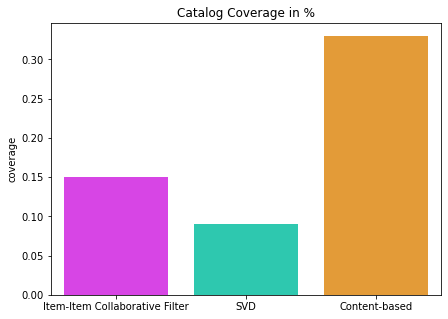

In [ ]:
# predicted rating > 4
catalog = items_df.movieId.unique().tolist()

svd_recs = [[318], [527], [4027], [593], [457], [922], [4226], [2571], [50], [750], [1220], [1263], [3949], [4973], [2858], [2028], [1196], [1282], [5349], [1219], [223], [5782], [2700], [2324], [3396]]
content_recs = [[318], [527], [4027], [593], [457], [922], [4226], [2571], [50], [750], [1220], [1263], [3949], [4973], [2858], [2028], [1196], [1282], [5349], [1219], [223], [5782], [2700], [2324], [3396],[1080],[1291],[1196],[260],[1210],[1270],[1240],[1036],[2571],[1197],[5952],[7153],[4306],[6539],[5349],[2959],[3578],[4896],[8368],[1221],[1242],[324],[235],[933],[744],[125],[654],[1243],[1342],
                [1332],[533],[2476],[832],[728],[947],[1246],[847],[362],[562],[947],[635],[937],[25],[1258],[457],[935],[82],[957],[742],[255],[2486],[951],[51],[2],[1345],[2143],[3252],[1233],[435],[745],[747],[523],[937],[324],[48],[947],[373],[561],[471],[1742],[2916],[482]]
svd_coverage = prediction_coverage(svd_recs, catalog)
content_coverage = prediction_coverage(content_recs, catalog)

item_item_coverage = prediction_coverage(item_item_cf_recs, catalog)

coverage_scores = [cf_coverage,svd_coverage, content_coverage]
model_names = ['Item-Item Collaborative Filter', 'SVD', 'Content-based']

fig = plt.figure(figsize=(7, 5))
recmetrics.coverage_plot(coverage_scores, model_names)

In [ ]:
def flatlist(lst):  
    for i in lst: 
        if type(i) == list: 
            flatlist(i) 
        else: 
            output.append(i) 

In [ ]:
# Personalization (dissimilarity between algorithms)
item_item = [1080,1291,1196,260,1210,1270,1240,1036,2571,1197,5952,7153,4306,6539,5349,2959,3578,4896,8368,1221]
svd = [318, 527, 4027, 593, 457, 922, 4226, 2571, 50, 750, 1220, 1263, 3949, 4973, 2858, 2028, 1196, 1282, 5349, 1219, 223, 5782, 2700, 2324, 3396]
output = []
flatlist(content_recs)
content = output

total_predictions = [item_item,svd,content]
recmetrics.personalization(predicted=total_predictions)

0.6205971727356183

# **Hybrid Recommender System**


### Mixed - Simply combine two 

In [ ]:
def mixed_hybrid_recommender(userID):
  print("Based on your watching history, we recommend you these movies : ")
  get_recommend_top_10_movies(userID,ratings,movies)
  print("Based on your favorite movie genre, you may like these movies : ")
  recommendation_top10(userID)

In [ ]:
mixed_hybrid_recommender(6)